 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 05 - Isolated digit recognition using Dynamic Time Warping (DTW) algorithm </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Dynamic Time Warping </b> <br>
We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation. 

In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
!pip install speechpy
!pip install python_speech_features

import scipy.io.wavfile
import io
import os

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=8b300ff5016efbc4dfcbf78b71e0cec99739957bc79aae5e6444483b8338aecb
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


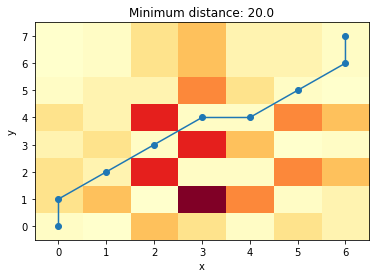

In [2]:
###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def DTW(template1,template2): 
    #######################################################
    # Input  : Two templates     cummulative_distance_matrix = np.zeros((len(template1) + 1, len(template2) + 1))

    # Output : DTW path and optimal distance 
    #######################################################
    distance_matrix = np.zeros((len(template1), len(template2)))

    for i in range(len(template1)):
      for j in range((len(template2))):
        x = template1[i] - template2[j]
        distance_matrix[i, j] = np.linalg.norm(x)**2

    # print(distance_matrix)

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################

    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((len(template1) + 1, len(template2) + 1)) # cummulative distance matrix
    DTW_cumulate_Matrix[0,1:] = np.inf
    DTW_cumulate_Matrix[1:,0] = np.inf 

    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1,len(template1) + 1 ,1): #you can start from 1 
        for j in range(1,len(template2) + 1,1):
            current_distance = distance_matrix[i-1, j-1] # Compute the euclidean distance between the current feature vectors

            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"
            DTW_cumulate_Matrix[i,j] = current_distance + min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################

    DTW_cumulate_Matrix = DTW_cumulate_Matrix[1:,1:]
    opt_distance = DTW_cumulate_Matrix[-1, -1]


    i =  len(template1) -1 # length of the template1
    j =  len(template2) -1 # length of the template2

    p, q = [i], [j]

    while ((i > 0) or (j > 0)): #Start from the last point and backtrack

        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])

        tb = np.argmin((DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1]))
        if (tb == 0):
            i -= 1
        elif (tb == 1):
            i -= 1
            j -= 1
        else:
            j -= 1
        p.insert(0, i)
        q.insert(0, j)

    # Store the required indexes to obtain the optimal path 
    optimal_path = (np.array(p), np.array(q))

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################

    return DTW_cumulate_Matrix, distance_matrix, optimal_path, opt_distance



def plotDTWpath(template1,template2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix 
    #######################################################

    cd, distance_matrix, path, dist = DTW(template1, template2)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.imshow(distance_matrix.T, origin='lower', cmap=plt.cm.YlOrRd, interpolation='nearest')
    plt.plot(path[0], path[1], '-o') # relation
    # plt.xticks(range(len(template1)))
    # plt.yticks(range(len(template2)))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('tight')
    plt.title('Minimum distance: {}'.format(dist))
    plt.show()


#testing code

# x = np.array([[0, 0], [0, 1], [1, 1], [1, 2], [2, 2], [4, 3], [2, 3], [1, 1], [2, 2], [0, 1], [9, 0]])
# y = np.array([[1, 0], [1, 1], [1, 1], [2, 1], [4, 3], [4, 3], [2, 3], [3, 1], [1, 2]])

x = np.array([4,3,7,0,2,6,5])
y = np.array([3,7,1,6,1,5,4,4])

plotDTWpath(x, y)

## Report and Observations

Using Dynamic Time Warping(DTW) Algorithm, we can find the optimal non-linear alignment between two time sequences of equal or unequal length. Right-Top most element of cummulative distance matrix gives the optimal cost or distance between two sequences.


**Part2**

In this part of the assignment, we expect you to build the isolated digit recognition system with the help of the above written DTW algorithm 

1. Record one repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.
2. Record three further repetitions of the same digits (isolated words) as test data.  
3. The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.   
4. Write an algorithm to perform isolated word recognition with the help of the DTW codes
5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   
6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. 
7. Create a confusion matrix and report the most confusing digits. 


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=2):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
# os.chdir("../")
os.mkdir("train_audio_dataset")
os.chdir("train_audio_dataset")

In [ ]:
#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration. 
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('seven.wav', 16000, fp_arr) #Please change the name.

rm: cannot remove 'recording.wav': No such file or directory
Recording the digits


<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/train2.zip /content/train_audio_dataset

  adding: content/train_audio_dataset/ (stored 0%)
  adding: content/train_audio_dataset/eight.wav (deflated 7%)
  adding: content/train_audio_dataset/four.wav (deflated 7%)
  adding: content/train_audio_dataset/seven.wav (deflated 7%)
  adding: content/train_audio_dataset/two.wav (deflated 7%)
  adding: content/train_audio_dataset/five.wav (deflated 7%)
  adding: content/train_audio_dataset/nine.wav (deflated 7%)
  adding: content/train_audio_dataset/one.wav (deflated 7%)
  adding: content/train_audio_dataset/three.wav (deflated 7%)
  adding: content/train_audio_dataset/six.wav (deflated 7%)
  adding: content/train_audio_dataset/zero.wav (deflated 7%)


**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [3]:
import speechpy
import scipy.io.wavfile as wav
from python_speech_features import mfcc

def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn

In [ ]:
# Loading dataset

# !rm -r test
# !rm -r train_audio_dataset

# !unzip test
# !unzip train

Archive:  test.zip
   creating: test/
  inflating: test/two_3.wav          
  inflating: test/five_3.wav         
  inflating: test/four_3.wav         
  inflating: test/seven_3.wav        
  inflating: test/three_2.wav        
  inflating: test/three_3.wav        
  inflating: test/zero_1.wav         
  inflating: test/two_2.wav          
  inflating: test/four_1.wav         
  inflating: test/nine_1.wav         
  inflating: test/one_2.wav          
  inflating: test/eight_2.wav        
  inflating: test/two_1.wav          
  inflating: test/one_3.wav          
  inflating: test/three_1.wav        
  inflating: test/nine_3.wav         
  inflating: test/one_1.wav          
  inflating: test/six_1.wav          
  inflating: test/eight_1.wav        
  inflating: test/five_2.wav         
  inflating: test/nine_2.wav         
  inflating: test/seven_2.wav        
  inflating: test/six_3.wav          
  inflating: test/four_2.wav         
  inflating: test/seven_1.wav        
  inflating:

**Algorithm to perform isolated digit recognition**

In [4]:
def algorithm(template):

  distances = np.array([])
  directory = 'train'

  x = os.listdir(directory)
  wave_dict = {'eight.wav' : 8, 'five.wav' : 5, 'four.wav' : 4, 'nine.wav' : 9, 'one.wav' : 1, 'seven.wav' : 7, 'six.wav' : 6, 'three.wav' : 3, 'two.wav' : 2, 'zero.wav' : 0}

  # sorting files
  files = np.array([])
  file_direc = np.array([])

  for filename in x:
    files = np.append(files, wave_dict[filename])

  files.sort()

  key_list = list(wave_dict.keys())
  val_list = list(wave_dict.values())

  for i in files:
    position = val_list.index(i)
    file_direc = np.append(file_direc, key_list[position])

  # iterate over files in train directory
  for filename in file_direc:
      f = os.path.join(directory, filename)
      # checking if it is a file
      if os.path.isfile(f):
          _, _, _ , dist= DTW(MFCC(f), MFCC(template))
          distances = np.append(distances, dist)
  
  return np.argmin(distances, axis=0)

# print(algorithm('test/one_1.wav'))

**Plot the optimal DTW path**

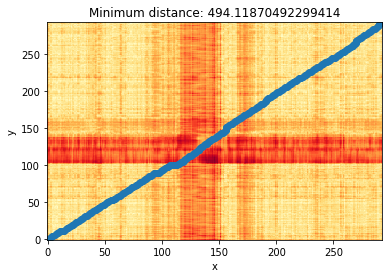

In [ ]:
plotDTWpath(MFCC('train/five.wav'), MFCC('test/five_3.wav'))
plotDTWpath(MFCC('train/five.wav'), MFCC('test/nine_3.wav'))

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [ ]:
digit_predictions = np.array([])
directory = 'test'

labels = {"zero_1.wav" : 0, "zero_2.wav" : 0, "zero_3.wav" : 0,
          "one_1.wav" : 1, "one_2.wav" : 1, "one_3.wav" : 1,
          "two_1.wav" : 2, "two_2.wav" : 2, "two_3.wav" : 2,
          "three_1.wav" : 3, "three_2.wav" : 3, "three_3.wav" : 3,
          "four_1.wav" : 4, "four_2.wav" : 4, "four_3.wav" : 4,
          "five_1.wav" : 5, "five_2.wav" : 5, "five_3.wav" : 5,
          "six_1.wav" : 6, "six_2.wav" : 6, "six_3.wav" : 6,
          "seven_1.wav" : 7, "seven_2.wav" : 7, "seven_3.wav" : 7,
          "eight_1.wav" : 8, "eight_2.wav" : 8, "eight_3.wav" : 8,
          "nine_1.wav" : 9, "nine_2.wav" : 9, "nine_3.wav" : 9}

# iterate over files in test directory
for filename in os.listdir(directory):
  print("Getting prediction for :", filename)
  f = os.path.join(directory, filename)
  # checking if it is a file
  if os.path.isfile(f):
    digit_predictions = np.append(digit_predictions, [algorithm(f), labels[filename]])
  
print(digit_predictions)

Getting prediction for : zero_1.wav
Getting prediction for : two_3.wav
Getting prediction for : one_1.wav
Getting prediction for : three_2.wav
Getting prediction for : eight_3.wav
Getting prediction for : five_3.wav
Getting prediction for : nine_1.wav
Getting prediction for : six_1.wav
Getting prediction for : four_2.wav
Getting prediction for : one_3.wav
Getting prediction for : six_2.wav
Getting prediction for : one_2.wav
Getting prediction for : nine_3.wav
Getting prediction for : seven_2.wav
Getting prediction for : eight_1.wav
Getting prediction for : two_1.wav
Getting prediction for : five_2.wav
Getting prediction for : zero_3.wav
Getting prediction for : seven_3.wav
Getting prediction for : three_3.wav
Getting prediction for : two_2.wav
Getting prediction for : four_1.wav
Getting prediction for : six_3.wav
Getting prediction for : four_3.wav
Getting prediction for : eight_2.wav
Getting prediction for : seven_1.wav
Getting prediction for : nine_2.wav
Getting prediction for : five

In [ ]:
pred = digit_predictions[0::2].astype('int')
true = digit_predictions[1::2].astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("DTW Accuracy :", accuracy)

DTW Accuracy : 0.8666666666666667


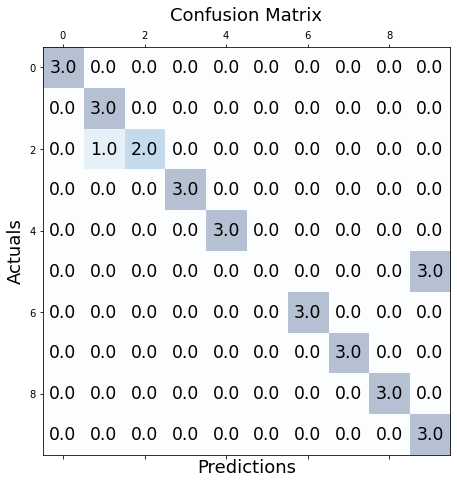

In [ ]:
K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Reporting confusion in digits predictions

From the confusion matrix, we can say that all the recordings of digit 5 is getting confused with recording of digit 9. And also there 33% confusion between recognition of digit 2 ( getting confused with digit 1)


**Part3**

In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  
1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy.
2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. 
3. Please report some of the changes to improve the system performance.

In [ ]:
## Example code to load wavefiles from drive
from google.colab import drive
import os
import soundfile as sf

#!unzip train2

drive.mount('/content/drive')

train_data_location = '/content/drive/My Drive/MultiSpeakerDigitData_modified/train/'
train_data_files = []
for root, dirs, files in os.walk(train_data_location):
    for file in files:
        if file.endswith(".wav"):
             train_data_files.append(os.path.join(root, file))
train_data_files = np.array(train_data_files)

bacground_data_location='/content/drive/My Drive/MultiSpeakerDigitData_modified/jackson/' #Change this location
jackson_bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             jackson_bacground_data_files.append(os.path.join(root, file))
jackson_bacground_data_files = np.array(jackson_bacground_data_files)

bacground_data_location='/content/drive/My Drive/MultiSpeakerDigitData_modified/nicolas/' #Change this location
nicolas_bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             nicolas_bacground_data_files.append(os.path.join(root, file))
nicolas_bacground_data_files = np.array(nicolas_bacground_data_files)

bacground_data_location='/content/drive/My Drive/MultiSpeakerDigitData_modified/theo/' #Change this location
theo_bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             theo_bacground_data_files.append(os.path.join(root, file))
theo_bacground_data_files = np.array(theo_bacground_data_files)

bacground_data_location='/content/drive/My Drive/MultiSpeakerDigitData_modified/yweweler/' #Change this location
yeweweler_bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             yeweweler_bacground_data_files.append(os.path.join(root, file))
yeweweler_bacground_data_files = np.array(yeweweler_bacground_data_files)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Iterate through the files and load them using "sig,sr = sf.read(filename)""

def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,rate,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20, highfreq =4000, winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn


import pandas as pd

train_labels = []
train_feature_list = []

nicolas_test_feature_list = []
nicolas_test_labels = []
theo_test_feature_list = []
theo_test_labels = []
jackson_test_feature_list = []
jackson_test_labels = []
yeweweler_test_feature_list = []
yeweweler_test_labels = []

for file in train_data_files:
  train_feature_list.append(MFCC(file))
  train_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/train/', 1)[1][0]))

train_data = {'features' : train_feature_list, 'labels' : train_labels}
train_df = pd.DataFrame(train_data)

train_df = train_df.sort_values('labels')

# print(train_df)

for file in theo_bacground_data_files:
  theo_test_feature_list.append(MFCC(file))
  theo_test_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/theo/', 1)[1][0]))

theo_test_data = {'features' : theo_test_feature_list, 'labels' : theo_test_labels}
theo_test_df = pd.DataFrame(theo_test_data)

# # print(theo_test_df)

for file in nicolas_bacground_data_files:
  nicolas_test_feature_list.append(MFCC(file))
  nicolas_test_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/nicolas/', 1)[1][0]))

nicolas_test_data = {'features' : nicolas_test_feature_list, 'labels' : nicolas_test_labels}
nicolas_test_df = pd.DataFrame(nicolas_test_data)

# print(nicolas_test_df)

for file in jackson_bacground_data_files:
  jackson_test_feature_list.append(MFCC(file))
  jackson_test_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/jackson/', 1)[1][0]))

jackson_test_data = {'features' : jackson_test_feature_list, 'labels' : jackson_test_labels}
jackson_test_df = pd.DataFrame(jackson_test_data)

# print(jackson_test_df)

for file in yeweweler_bacground_data_files:
  yeweweler_test_feature_list.append(MFCC(file))
  yeweweler_test_labels.append(int(file.split('/content/drive/My Drive/MultiSpeakerDigitData_modified/yweweler/', 1)[1][0]))

yeweweler_test_data = {'features' : yeweweler_test_feature_list, 'labels' : yeweweler_test_labels}
yeweweler_test_df = pd.DataFrame(yeweweler_test_data)

# print(yeweweler_test_df)

In [ ]:
def dtw_pred(train, test):

  pred = np.array([])
  for index, row in test.iterrows():
    distances = np.array([])
    test_template = row['features']
    for index2, row2 in train.iterrows():
      train_template = row2['features']
      _, _, _ , dist= DTW(test_template, train_template)
      distances = np.append(distances, dist)
    pred = np.append(pred, np.argmin(distances, axis=0))

  return pred

#same speaker
jackson_pred = dtw_pred(train_df, jackson_test_df)

#different speaker with jackson training samples
theo_pred = dtw_pred(train_df, theo_test_df)
nicolas_pred = dtw_pred(train_df, nicolas_test_df)
yeweweler_pred = dtw_pred(train_df, yeweweler_test_df)

Same speaker Accuracy (Jackson) : 0.889795918367347


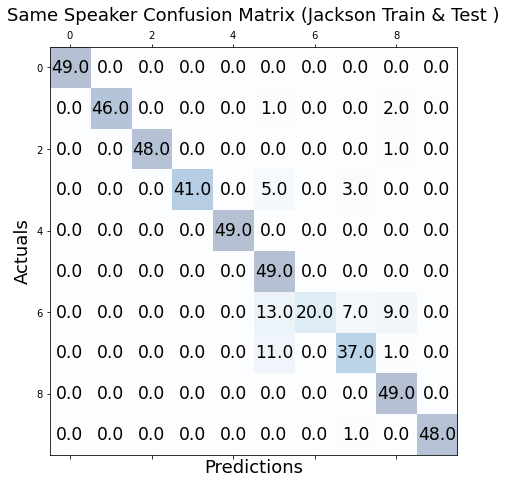

In [ ]:
true = jackson_test_df['labels'].astype('int')
pred = jackson_pred.astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("Same speaker Accuracy (Jackson) :", accuracy)

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Same Speaker Confusion Matrix (Jackson Train & Test )', fontsize=18)
plt.show()

Different speaker Accuracy (Jackson & Theo) : 0.42


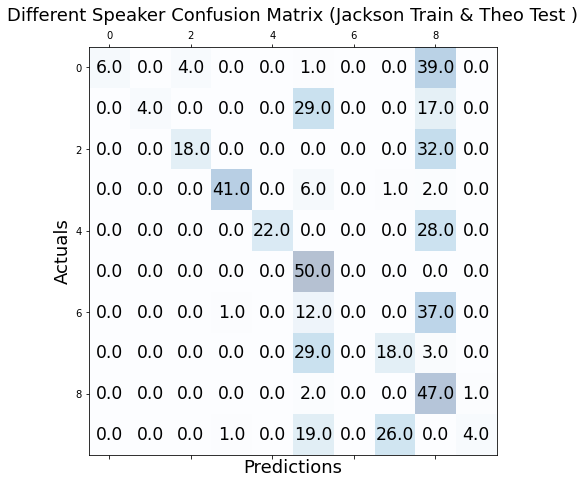

In [ ]:
true = theo_test_df['labels'].astype('int')
pred = theo_pred.astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("Different speaker Accuracy (Jackson & Theo) :", accuracy)

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Different Speaker Confusion Matrix (Jackson Train & Theo Test )', fontsize=18)
plt.show()

Different speaker Accuracy (Jackson & Nicolas) : 0.218


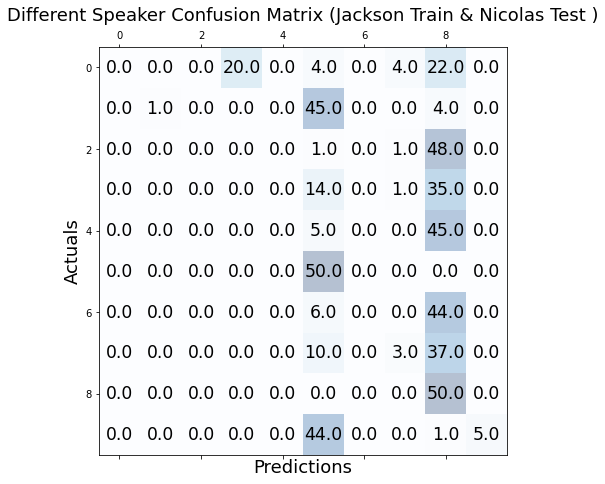

In [ ]:
true = nicolas_test_df['labels'].astype('int')
pred = nicolas_pred.astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("Different speaker Accuracy (Jackson & Nicolas) :", accuracy)

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Different Speaker Confusion Matrix (Jackson Train & Nicolas Test )', fontsize=18)
plt.show()

Different speaker Accuracy (Jackson & Yweweler) : 0.374


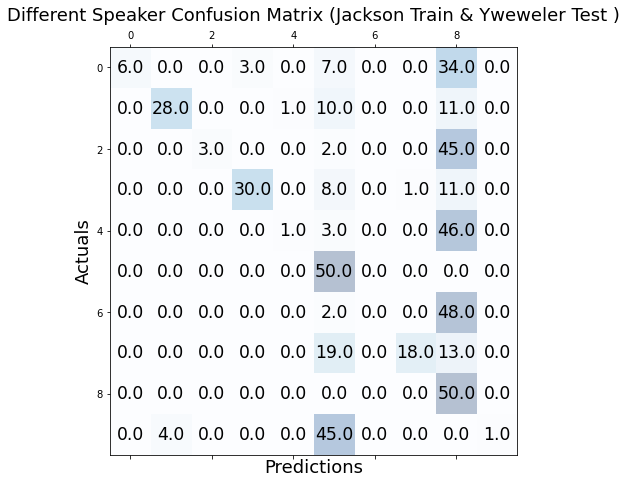

In [ ]:
true = yeweweler_test_df['labels'].astype('int')
pred = yeweweler_pred.astype('int')

correct = np.sum(pred == true)
accuracy = correct/len(true)

print("Different speaker Accuracy (Jackson & Yweweler) :", accuracy)

K = len(np.unique(true)) # Number of classes 
conf_matrix= np.zeros((K, K))

for i in range(len(true)):
  conf_matrix[true[i]][pred[i]] += 1

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Different Speaker Confusion Matrix (Jackson Train & Yweweler Test )', fontsize=18)
plt.show()

## Report

Though DTW algorithm is good as a measure of non-linear similarity between two sequences from same speaker, we can observe that it fails to recognize isolated digit audio samples if speakers for train and test are different.

Improvement in the performance can be brought by incoporating K-Nearest Neighbour algorithm where we fit :
1. DTW matrix [10x10] (containing distances between all pair of files in train folder)
2. And labels for each row of above matrix i.e Y [10x1]

Then take the new test samples and based on the K nearest neighbours, we do the prediction